In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit_aer.primitives import Estimator
from qiskit_aer.noise import NoiseModel, ReadoutError, depolarizing_error
from qiskit.circuit.library import IQP
import numpy as np

In [2]:
qubits=QuantumRegister(2, name="q")
circuit=QuantumCircuit(qubits)

In [3]:
q0, q1=qubits
circuit.h(q0)
circuit.cx(q0,q1)
circuit.measure_all()


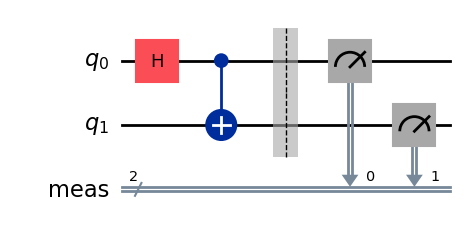

In [4]:
circuit.draw("mpl")

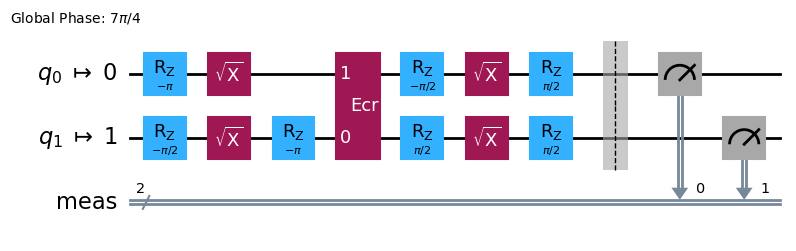

In [5]:
service=QiskitRuntimeService()
backend= service.backend("ibm_brisbane")
pass_manager = generate_preset_pass_manager(1, backend=backend)
transpiled = pass_manager.run(circuit)
transpiled.draw("mpl", idle_wires=False)

In [6]:
observable=SparsePauliOp("ZZ")

In [7]:
# Estimator 
estimator=Estimator()
job=estimator.run(circuit, observable)
exact_value=job.result().values[0]
print(exact_value)

1.0


In [8]:
#Noise Model creation

noise_model=NoiseModel()
cx_depolarizing_prob=0.02
bit_flip_prob=0.05
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(cx_depolarizing_prob, 2), ["cx"]
)
noise_model.add_all_qubit_readout_error(
    ReadoutError(
        [
            [1 - bit_flip_prob, bit_flip_prob],
            [bit_flip_prob, 1 - bit_flip_prob],
        ]
    )
)

In [9]:
n_qubits=127
mat=np.real(random_hermitian(n_qubits,seed=1234))
circuit=IQP(mat)
observable-SparsePauliOp("Z" * n_qubits)


QiskitError: 'Cannot add shapes width different total left dimension 4 != 170141183460469231731687303715884105728'

In [ ]:
job=estimator.run(circuit,observable)
result=job.result()
print(result)